In [154]:
# An analysis of the notebook and its conlucions can be found at:

In [ ]:
#We import the libraries and read de data

import os
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/Users/inigo/Desktop/Projects/Datasets"
csv_path=os.path.join(path,"csgo_round_snapshots.csv")
counter=pd.read_csv(csv_path)


In [148]:
#We analize the dataset

counter.info()
counter.head()
counter["map"].value_counts() #We analize how many maps they play
counter.describe() #Preliminary analysis of our data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [155]:
#We do our analysis on one map= inferno

original=counter.copy()
counter=counter[(counter['map'] == 'de_inferno')]
counter.drop('map',axis=1,inplace=True)

#The dataset is too big, we have to simplify it using our CSGO knowledge, we delete most of the guns
#We delete all guns info except from AK47 and AWP

counter.drop(counter.iloc[:,21:95], axis=1,inplace=True) 
counter.drop(counter.iloc[:,17:19], axis=1,inplace=True)
  
#We add a column for the round they`re in, ct_score + t_score and delete one of them, t_score

counter['round']=counter['ct_score']+counter['t_score']
counter.drop('t_score',axis=1,inplace=True)
#Re-order to insert "round" at beginning

counter.columns
new_columns=['time_left', 'ct_score', 'round', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money','ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_awp', 't_weapon_awp',
       'round_winner']
counter=counter.reindex(columns=new_columns)

In [143]:
time_left, ct_score, round, bomb_planted,ct_health,t_health, ct_armor, t_armor, ct_money,t_money,ct_helmets,t_helmets, ct_defuse_kits, ct_players_alive, t_players_alive, ct_weapon_ak47, t_weapon_ak47, ct_weapon_awp, t_weapon_awp,round_winner

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23811 entries, 628 to 121416
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_left         23811 non-null  float64
 1   ct_score          23811 non-null  float64
 2   round             23811 non-null  float64
 3   bomb_planted      23811 non-null  bool   
 4   ct_health         23811 non-null  float64
 5   t_health          23811 non-null  float64
 6   ct_armor          23811 non-null  float64
 7   t_armor           23811 non-null  float64
 8   ct_money          23811 non-null  float64
 9   t_money           23811 non-null  float64
 10  ct_helmets        23811 non-null  float64
 11  t_helmets         23811 non-null  float64
 12  ct_defuse_kits    23811 non-null  float64
 13  ct_players_alive  23811 non-null  float64
 14  t_players_alive   23811 non-null  float64
 15  ct_weapon_ak47    23811 non-null  float64
 16  t_weapon_ak47     23811 non-null  flo

Text(0.5, 1.0, 'Correlation matrix')

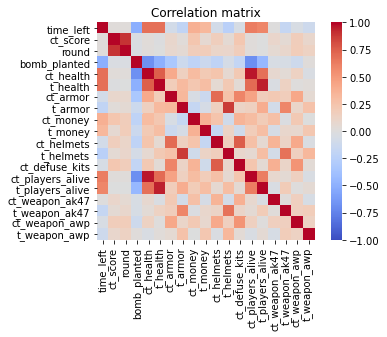

In [91]:
#We have our dataset ready, we do a preliminary graphical study
import seaborn as sns

#Pairplot but just without using discrete features (we have too much features)
'''
df_graph=counter.copy()
df_graph=df_graph.iloc[:,0:10].drop('bomb_planted',axis=1)
df_graph['round_winner']=counter['round_winner']

sns_plot=sns.pairplot(df_graph, hue="round_winner", diag_kind="hist") #All features against each other
#We see that some classifiers could be applied and that some features require transformations
sns_plot.savefig("/Users/inigo/Desktop/Projects/CSGO/Figures/PairPlot")

'''
ax = sns.heatmap(counter.corr(), 
                vmin=-1, vmax=1, center=0,
                cmap='coolwarm',
                square=True
)
ax.set_xticklabels( ax.get_xticklabels() )
ax.set_title('Correlation matrix')
#Correlation between round and scores as expected, no big corr between rest of features




In [156]:
# We load the CFS algorithm for the Feature Subset Selection

def merit_calculation(X, y):
    """
    This function calculates the merit of X given class labels y, where
    merits = (k * rcf)/sqrt(k+k*(k-1)*rff)
    rcf = (1/k)*sum(su(fi,y)) for all fi in X
    rff = (1/(k*(k-1)))*sum(su(fi,fj)) for all fi and fj in X
    Input
    ----------
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    Output
    ----------
    merits: {float}
        merit of a feature subset X
    """

    n_samples, n_features = X.shape
    rff = 0
    rcf = 0
    for i in range(n_features):
        fi = X[:, i]
        rcf += su_calculation(fi, y)
        for j in range(n_features):
            if j > i:
                fj = X[:, j]
                rff += su_calculation(fi, fj)
    rff *= 2
    merits = rcf / np.sqrt(n_features + rff)
    return merits

def cfs(X, y):
    """
    This function uses a correlation based heuristic to evaluate the worth of features which is called CFS
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    Output
    ------
    F: {numpy array}
        index of selected features
    Reference
    ---------
    Zhao, Zheng et al. "Advancing Feature Selection Research - ASU Feature Selection Repository" 2010.
    """

    n_samples, n_features = X.shape
    F = []
    # M stores the merit values
    M = []
    while True:
        merit = -100000000000
        idx = -1
        for i in range(n_features):
            if i not in F:
                F.append(i)
                # calculate the merit of current selected features
                t = merit_calculation(X[:, F], y)
                if t > merit:
                    merit = t
                    idx = i
                F.pop()
        F.append(idx)
        M.append(merit)
        if len(M) > 5:
            if M[len(M)-1] <= M[len(M)-2]:
                if M[len(M)-2] <= M[len(M)-3]:
                    if M[len(M)-3] <= M[len(M)-4]:
                        if M[len(M)-4] <= M[len(M)-5]:
                            break
    return np.array(F)

# We proceed in 4 different ways 

### Feature subset selection 

In [158]:
X_new.columns

Index(['ct_defuse_kits', 'bomb_planted', 'time_left', 't_helmets',
       'ct_helmets', 'ct_weapon_ak47', 'ct_weapon_awp', 'ct_players_alive',
       't_armor', 't_weapon_ak47', 'ct_armor', 't_weapon_awp', 'round_winner'],
      dtype='object')

In [157]:
# We apply different filters for the subset selection

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from ReliefF import ReliefF
from skfeature.utility.mutual_information import su_calculation
import scipy.io
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


#UNIVARIATE FILTER
'''
X=counter.drop('round_winner',axis=1)
Y=counter['round_winner']

# Create and fit selector
selector = SelectKBest(chi2, k=10)
selector.fit(X, Y)

# Get columns to keep and create new dataframe(X_new) with those only
cols = selector.get_support(indices=True)
X_new = X.iloc[:,cols]
X_new['round_winner']=counter['round_winner']


'''
#MULTIVARIATE FILTER


X=counter.drop(['round_winner'],axis=1)
Y=counter['round_winner']

#The input of the CFS algorithm have to be arrays

X_array=X.to_numpy()
Y_array=Y.to_numpy()

result=cfs(X_array,Y_array)
X_new = X.iloc[:,result]
X_new['round_winner']=counter['round_winner']

'''
#WRAPPER APPROACHE

X=counter.drop('round_winner',axis=1)
Y=counter['round_winner']
cols_list=[]
models=[KNeighborsClassifier(weights='distance'),MLPClassifier(random_state=42, max_iter=300),
        DecisionTreeClassifier(criterion='gini',random_state=42),SVC(kernel='rbf')]

for model in models:
    sfs =  SFS(model, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

    sfs = sfs.fit(X, Y)
    cols = sfs.k_feature_idx_
    cols_list.append(cols)

X_kNN = X.iloc[:,np.array(cols_list[0])]
X_NN = X.iloc[:,np.array(cols_list[1])]
X_Dtree = X.iloc[:,np.array(cols_list[2])]
X_svm = X.iloc[:,np.array(cols_list[3])]
'''

   



<ipython-input-157-6bf954189a95>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['round_winner']=counter['round_winner']


"\n#WRAPPER APPROACHE\n\nX=counter.drop('round_winner',axis=1)\nY=counter['round_winner']\ncols_list=[]\nmodels=[KNeighborsClassifier(weights='distance'),MLPClassifier(random_state=42, max_iter=300),\n        DecisionTreeClassifier(criterion='gini',random_state=42),SVC(kernel='rbf')]\n\nfor model in models:\n    sfs =  SFS(model, \n           k_features=10, \n           forward=True, \n           floating=False, \n           verbose=2,\n           scoring='accuracy',\n           cv=5)\n\n    sfs = sfs.fit(X, Y)\n    cols = sfs.k_feature_idx_\n    cols_list.append(cols)\n\nX_kNN = X.iloc[:,np.array(cols_list[0])]\nX_NN = X.iloc[:,np.array(cols_list[1])]\nX_Dtree = X.iloc[:,np.array(cols_list[2])]\nX_svm = X.iloc[:,np.array(cols_list[3])]\n"

In [135]:
X_kNN = X.iloc[:,np.array(cols_list[0])]
X_kNN['round_winner']=counter['round_winner']

X_NN = X.iloc[:,np.array(cols_list[1])]
X_NN['round_winner']=counter['round_winner']

X_Dtree = X.iloc[:,np.array(cols_list[2])]
X_Dtree['round_winner']=counter['round_winner']

X_svm = X.iloc[:,np.array(cols_list[3])]
X_svm['round_winner']=counter['round_winner']


<ipython-input-135-d140cf4d7eb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_kNN['round_winner']=counter['round_winner']
<ipython-input-135-d140cf4d7eb3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_NN['round_winner']=counter['round_winner']
<ipython-input-135-d140cf4d7eb3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [136]:
X_svm.head()

,ct_score,ct_health,t_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_weapon_ak47,round_winner
628,0.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,T
629,0.0,500.0,500.0,300.0,300.0,0.0,0.0,1.0,5.0,0.0,CT
630,0.0,500.0,500.0,300.0,300.0,0.0,0.0,1.0,5.0,0.0,CT
631,0.0,500.0,400.0,300.0,200.0,0.0,0.0,1.0,5.0,0.0,CT
632,1.0,500.0,500.0,298.0,0.0,0.0,0.0,1.0,5.0,0.0,CT


In [137]:
#We import everything and create 5 algorithms

from sklearn.neighbors import KNeighborsClassifier
import wittgenstein as lw
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC

clf1 = KNeighborsClassifier(weights='distance')#k-NN
clf2 = lw.RIPPER(random_state=42)
clf3 = MLPClassifier(random_state=42, max_iter=300)
clf4 = DecisionTreeClassifier(criterion='gini',random_state=42) #{“gini”, “entropy”}
clf5 = SVC(kernel='rbf')#The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples


In [138]:
#We train and obtain the accuracy

train_set1, test_set1 = train_test_split(X_kNN,test_size=0.2,random_state=42)
train_set3, test_set3 = train_test_split(X_NN,test_size=0.2,random_state=42)
train_set4, test_set4 = train_test_split(X_Dtree,test_size=0.2,random_state=42)
train_set5, test_set5 = train_test_split(X_svm,test_size=0.2,random_state=42)

X_train1=train_set1.drop('round_winner',axis=1)
X_train3=train_set3.drop('round_winner',axis=1)
X_train4=train_set4.drop('round_winner',axis=1)
X_train5=train_set5.drop('round_winner',axis=1)

Y_train1=train_set1['round_winner']
Y_train3=train_set3['round_winner']
Y_train4=train_set4['round_winner']
Y_train5=train_set5['round_winner']

X_test1=test_set1.drop('round_winner',axis=1)
X_test3=test_set3.drop('round_winner',axis=1)
X_test4=test_set4.drop('round_winner',axis=1)
X_test5=test_set5.drop('round_winner',axis=1)

Y_test1=test_set1['round_winner']
Y_test3=test_set3['round_winner']
Y_test4=test_set4['round_winner']
Y_test5=test_set5['round_winner']

clf1.fit(X_train1,Y_train1)
#clf2.fit(train_set, class_feat='round_winner', pos_class='CT' )
clf3.fit(X_train3,Y_train3)
clf4.fit(X_train4,Y_train4)
clf5.fit(X_train5,Y_train5)
    

y_pred1=clf1.predict(X_test1)
#precision = clf2.score(X_test, Y_test,metrics.accuracy_score)
y_pred3=clf3.predict(X_test3)
y_pred4=clf4.predict(X_test4)
y_pred5=clf5.predict(X_test5)
    


print("Accuracy for k-NN:",metrics.accuracy_score(Y_test1, y_pred1))
#print("Accuracy for RIPPER:",precision) #clf2.ruleset_.out_pretty() to check decision making
print("Accuracy for Neural Networks:",metrics.accuracy_score(Y_test3, y_pred3))
print("Accuracy for Decision Trees:",metrics.accuracy_score(Y_test4, y_pred4))
print("Accuracy for Svm:",metrics.accuracy_score(Y_test5, y_pred5))
    
    

Accuracy for k-NN: 0.7247533067394499
Accuracy for Neural Networks: 0.7474280915389461
Accuracy for Decision Trees: 0.7698929246273357
Accuracy for Svm: 0.7432290573168171


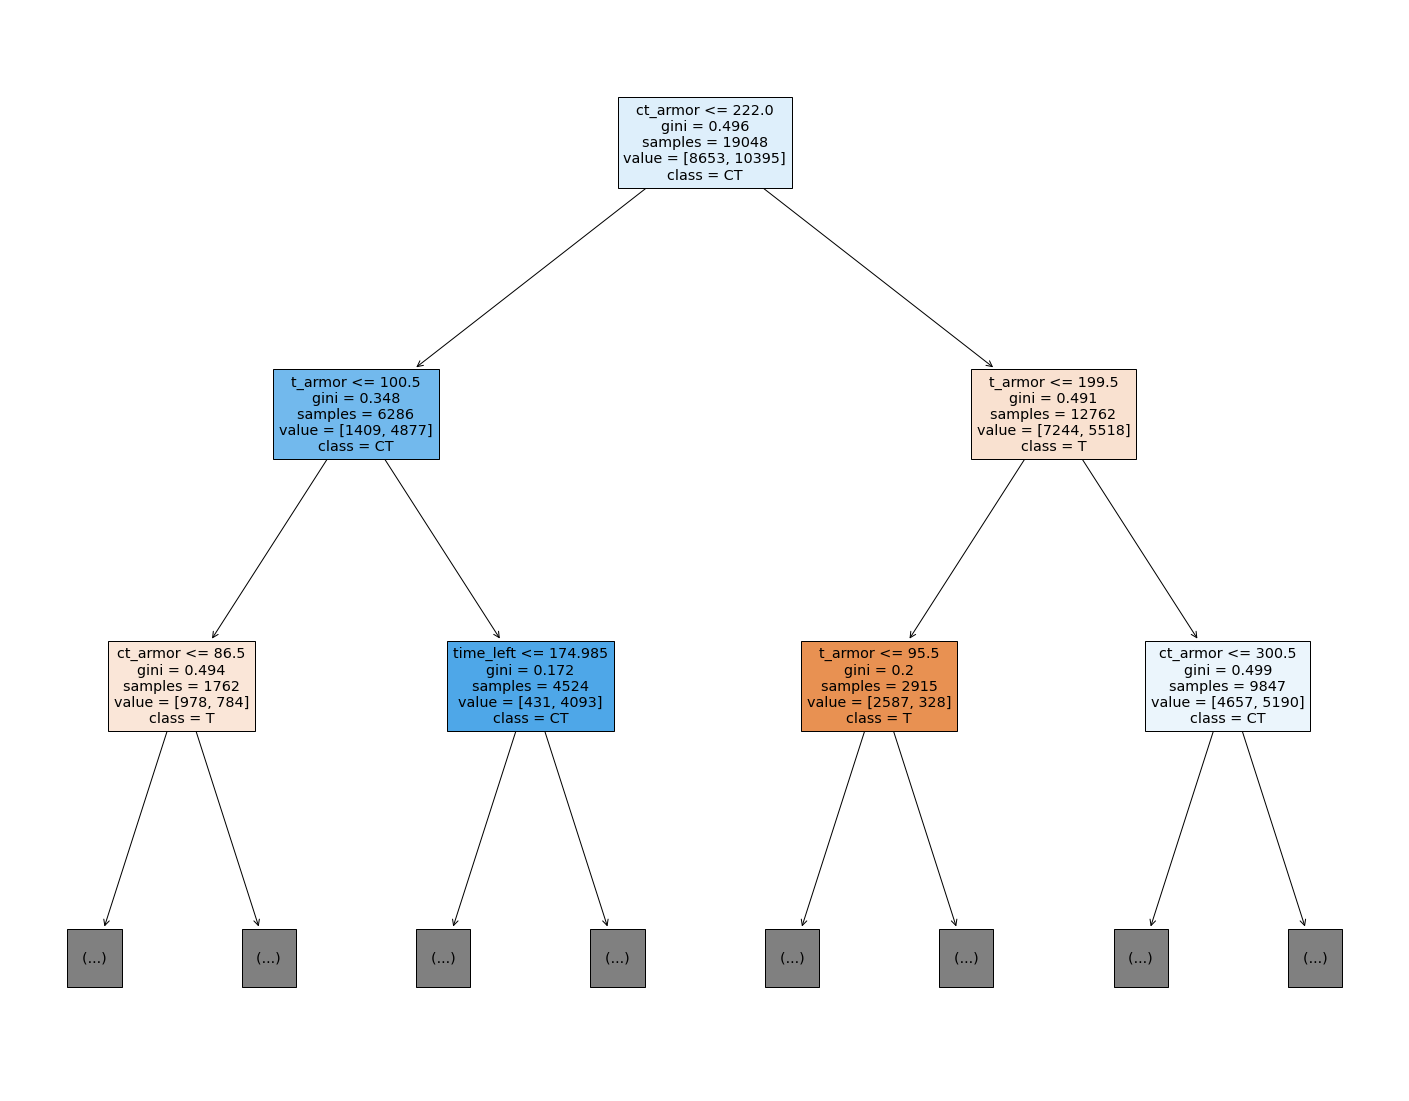

In [105]:
# We plot the tree

from sklearn import tree

feature_names=X_train.columns  
class_names=['T','CT']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf4,max_depth=2,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

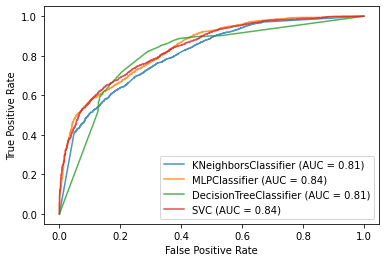

In [139]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

'''
#Confusion matrix

disp = plot_confusion_matrix(clf5, X_test, Y_test,
                                 #display_labels=[CT,T],
                                 cmap=plt.cm.Blues)

disp.ax_.set_title('Confusion matrix for SVM')

'''
#ROC curve

ax = plt.gca()

rfc_disp1 = plot_roc_curve(clf1, X_test1, Y_test1, ax=ax, alpha=0.8)
rfc_disp2 = plot_roc_curve(clf3, X_test3, Y_test3, ax=ax, alpha=0.8)
rfc_disp3 = plot_roc_curve(clf4, X_test4, Y_test4, ax=ax, alpha=0.8)
rfc_disp4 = plot_roc_curve(clf5, X_test5, Y_test5, ax=ax, alpha=0.8)

plt.savefig('/Users/inigo/Desktop/Projects/CSGO/Figures/Wrapper_ROCcurve')
plt.show()


In [146]:
from mlxtend.plotting import plot_decision_regions

# PLOTTING DECISION REGIONS
#X_svm = X.iloc[:,np.array(cols_list[3])]
#X_svm['round_winner']=counter['round_winner']

counter.replace({'T': 0, 'CT': 1},inplace=True)
X = X_svm.iloc[:,[2,4]].sample(frac=0.2,random_state=2) #t_armor and t_money
y = counter['round_winner'].sample(frac=1,random_state=2)

 
# Training a classifier

clf1 = KNeighborsClassifier(n_neighbors=5,weights='distance')
clf3 = MLPClassifier(random_state=42, max_iter=300)
clf4 = DecisionTreeClassifier(criterion='gini',random_state=42) 
clf5 = SVC(kernel='rbf')

clf1.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)
clf5.fit(X, y)
print('Start plotting')

# Plotting decision regions
X_array=X.to_numpy()
y_array=y.to_numpy()
#We convert CT/T to 0-1 (need it for later)
        
y_array=y_array.astype(np.integer)       
plot_decision_regions(X_array, y_array, clf=clf5)

# Adding axes annotations
plt.xlabel('t_armor')
plt.ylabel('t_money')
plt.title('Decision regions for SVM')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4762, 23811]

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(counter,test_size=0.2,random_state=42)

X_train=train_set.drop('round_winner',axis=1)
Y_train=train_set['round_winner']

X_test=test_set.drop('round_winner',axis=1)
Y_test=test_set['round_winner']

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)



In [148]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test,y_pred ).ravel()

feature_imp = pd.Series(clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)

Accuracy: 0.8943942893134579
